# Breast Cancer Dataset

In [513]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading the dataset and basic processing

In [549]:
data = pd.read_excel('./Potential datasets for recruitment.xlsx', sheet_name=1)
data.head()

Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  \
0           1                3                1        1   
1          10                3                2        1   
2           2                3                1        1   
3           4                3                7        1   
4           1                3                1        1   

   Class: (2 for benign,  4 for malignant)   4 for malignant)  
0                                        2                NaN  
1                                        2                NaN  
2                                        2                NaN  
3                                        2                NaN  
4                                        2                NaN

In [515]:
data.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class: (2 for benign,  4 for malignant)',
       ' 4 for malignant)'],
      dtype='object')

In [516]:
data.drop(columns=' 4 for malignant)', inplace=True)

In [517]:
data.dtypes

Sample code number                          int64
Clump Thickness                             int64
Uniformity of Cell Size                     int64
Uniformity of Cell Shape                    int64
Marginal Adhesion                           int64
Single Epithelial Cell Size                 int64
Bare Nuclei                                object
Bland Chromatin                             int64
Normal Nucleoli                             int64
Mitoses                                     int64
Class: (2 for benign,  4 for malignant)     int64
dtype: object

In [518]:
data.count()

Sample code number                         699
Clump Thickness                            699
Uniformity of Cell Size                    699
Uniformity of Cell Shape                   699
Marginal Adhesion                          699
Single Epithelial Cell Size                699
Bare Nuclei                                699
Bland Chromatin                            699
Normal Nucleoli                            699
Mitoses                                    699
Class: (2 for benign,  4 for malignant)    699
dtype: int64

In [519]:
data['Bare Nuclei'].unique()

array([1, 10, 2, 4, 3, 9, 7, '?', 5, 8, 6], dtype=object)

In [520]:
data['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

Hence, *Bare Nuclei* has 16 unknown values.

In [521]:
data.replace({'Class: (2 for benign,  4 for malignant)':{2:0, 4:1}}, inplace=True)

In [522]:
data['Class: (2 for benign,  4 for malignant)'].mean()

0.3447782546494993

Hence, we have around 35% positive cases (data is not uniformly distributed).

# Filling/Eliminating missing values 

In [523]:
data1 = data[data['Bare Nuclei'] != '?']
data1['Bare Nuclei'] = data1['Bare Nuclei'].astype(int)
data1.count()

d:\desk\ml\mlenv64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Sample code number                         683
Clump Thickness                            683
Uniformity of Cell Size                    683
Uniformity of Cell Shape                   683
Marginal Adhesion                          683
Single Epithelial Cell Size                683
Bare Nuclei                                683
Bland Chromatin                            683
Normal Nucleoli                            683
Mitoses                                    683
Class: (2 for benign,  4 for malignant)    683
dtype: int64

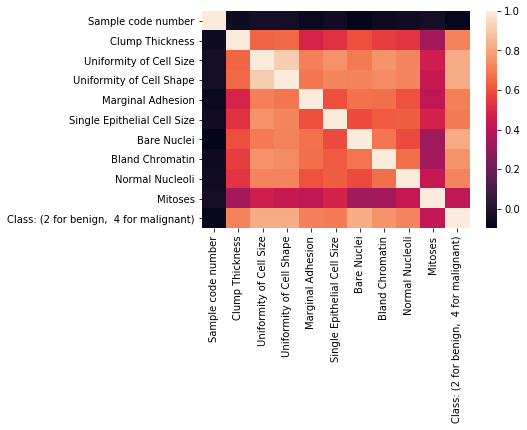

In [524]:
sns.heatmap(data1.corr())

We see that *Bare Nuclei* is heavily correlated with almost all features. Also, its distribution:

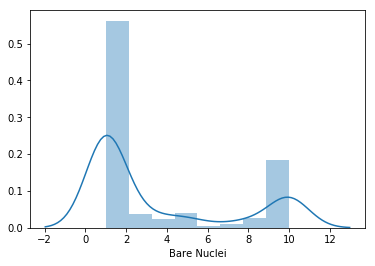

In [525]:
sns.distplot(data1['Bare Nuclei'])

We can either delete the missing value rows, or impute them with predicted values. Let's try to predict missing values.

In [526]:
data.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses',
       'Class: (2 for benign,  4 for malignant)'],
      dtype='object')

In [527]:
from sklearn.svm import SVR
PREDICTORS = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bland Chromatin',
       'Normal Nucleoli',
       'Class: (2 for benign,  4 for malignant)']


In [528]:
svr = SVR(kernel='linear')
svr.fit(data1[PREDICTORS], data1['Bare Nuclei'])
predictions = svr.predict(data1[PREDICTORS])

In [529]:
from sklearn.metrics import mean_squared_error, accuracy_score
mean_squared_error(predictions, data1['Bare Nuclei'])

4.524933171886242

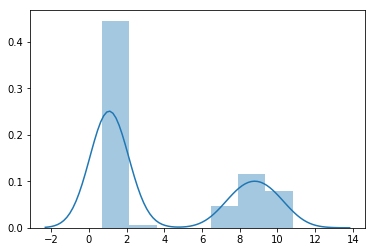

In [530]:
sns.distplot(predictions)

Hence, predicting values gives completely unacceptable results, and we go with simply removing those values.

In [531]:
data = data[data['Bare Nuclei'] != '?']
data.count()

Sample code number                         683
Clump Thickness                            683
Uniformity of Cell Size                    683
Uniformity of Cell Shape                   683
Marginal Adhesion                          683
Single Epithelial Cell Size                683
Bare Nuclei                                683
Bland Chromatin                            683
Normal Nucleoli                            683
Mitoses                                    683
Class: (2 for benign,  4 for malignant)    683
dtype: int64

In [532]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int64')

In [533]:
data.dtypes

Sample code number                         int64
Clump Thickness                            int64
Uniformity of Cell Size                    int64
Uniformity of Cell Shape                   int64
Marginal Adhesion                          int64
Single Epithelial Cell Size                int64
Bare Nuclei                                int64
Bland Chromatin                            int64
Normal Nucleoli                            int64
Mitoses                                    int64
Class: (2 for benign,  4 for malignant)    int64
dtype: object

# Visualisations and Inferences

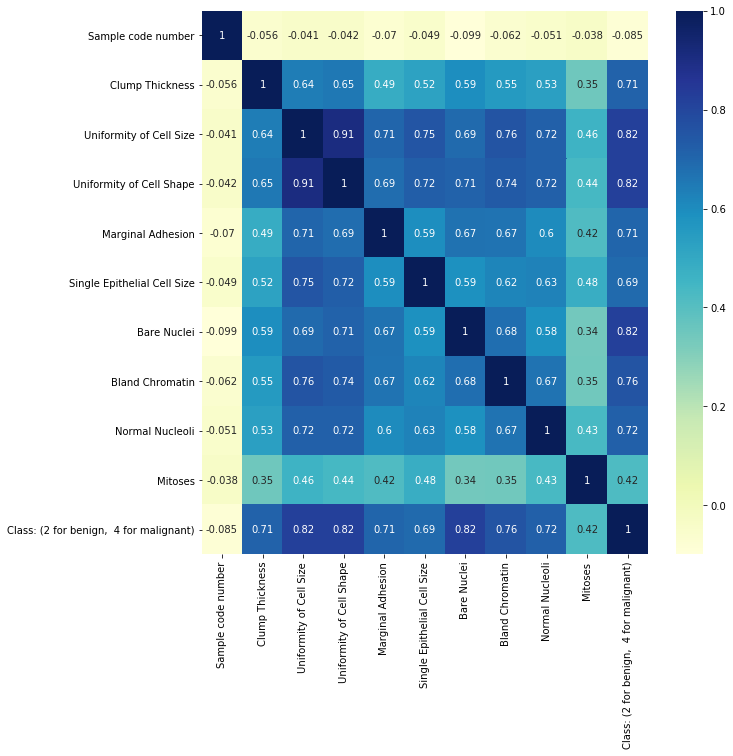

In [534]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

As noted earlier, the features are very correlated amongst themselves, and point to a need for dimensionality reduction further.

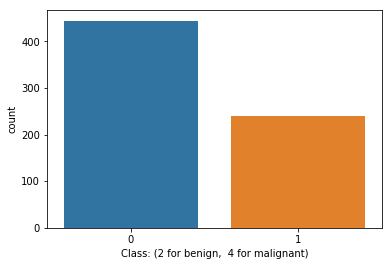

In [535]:
sns.countplot(x = data['Class: (2 for benign,  4 for malignant)'])

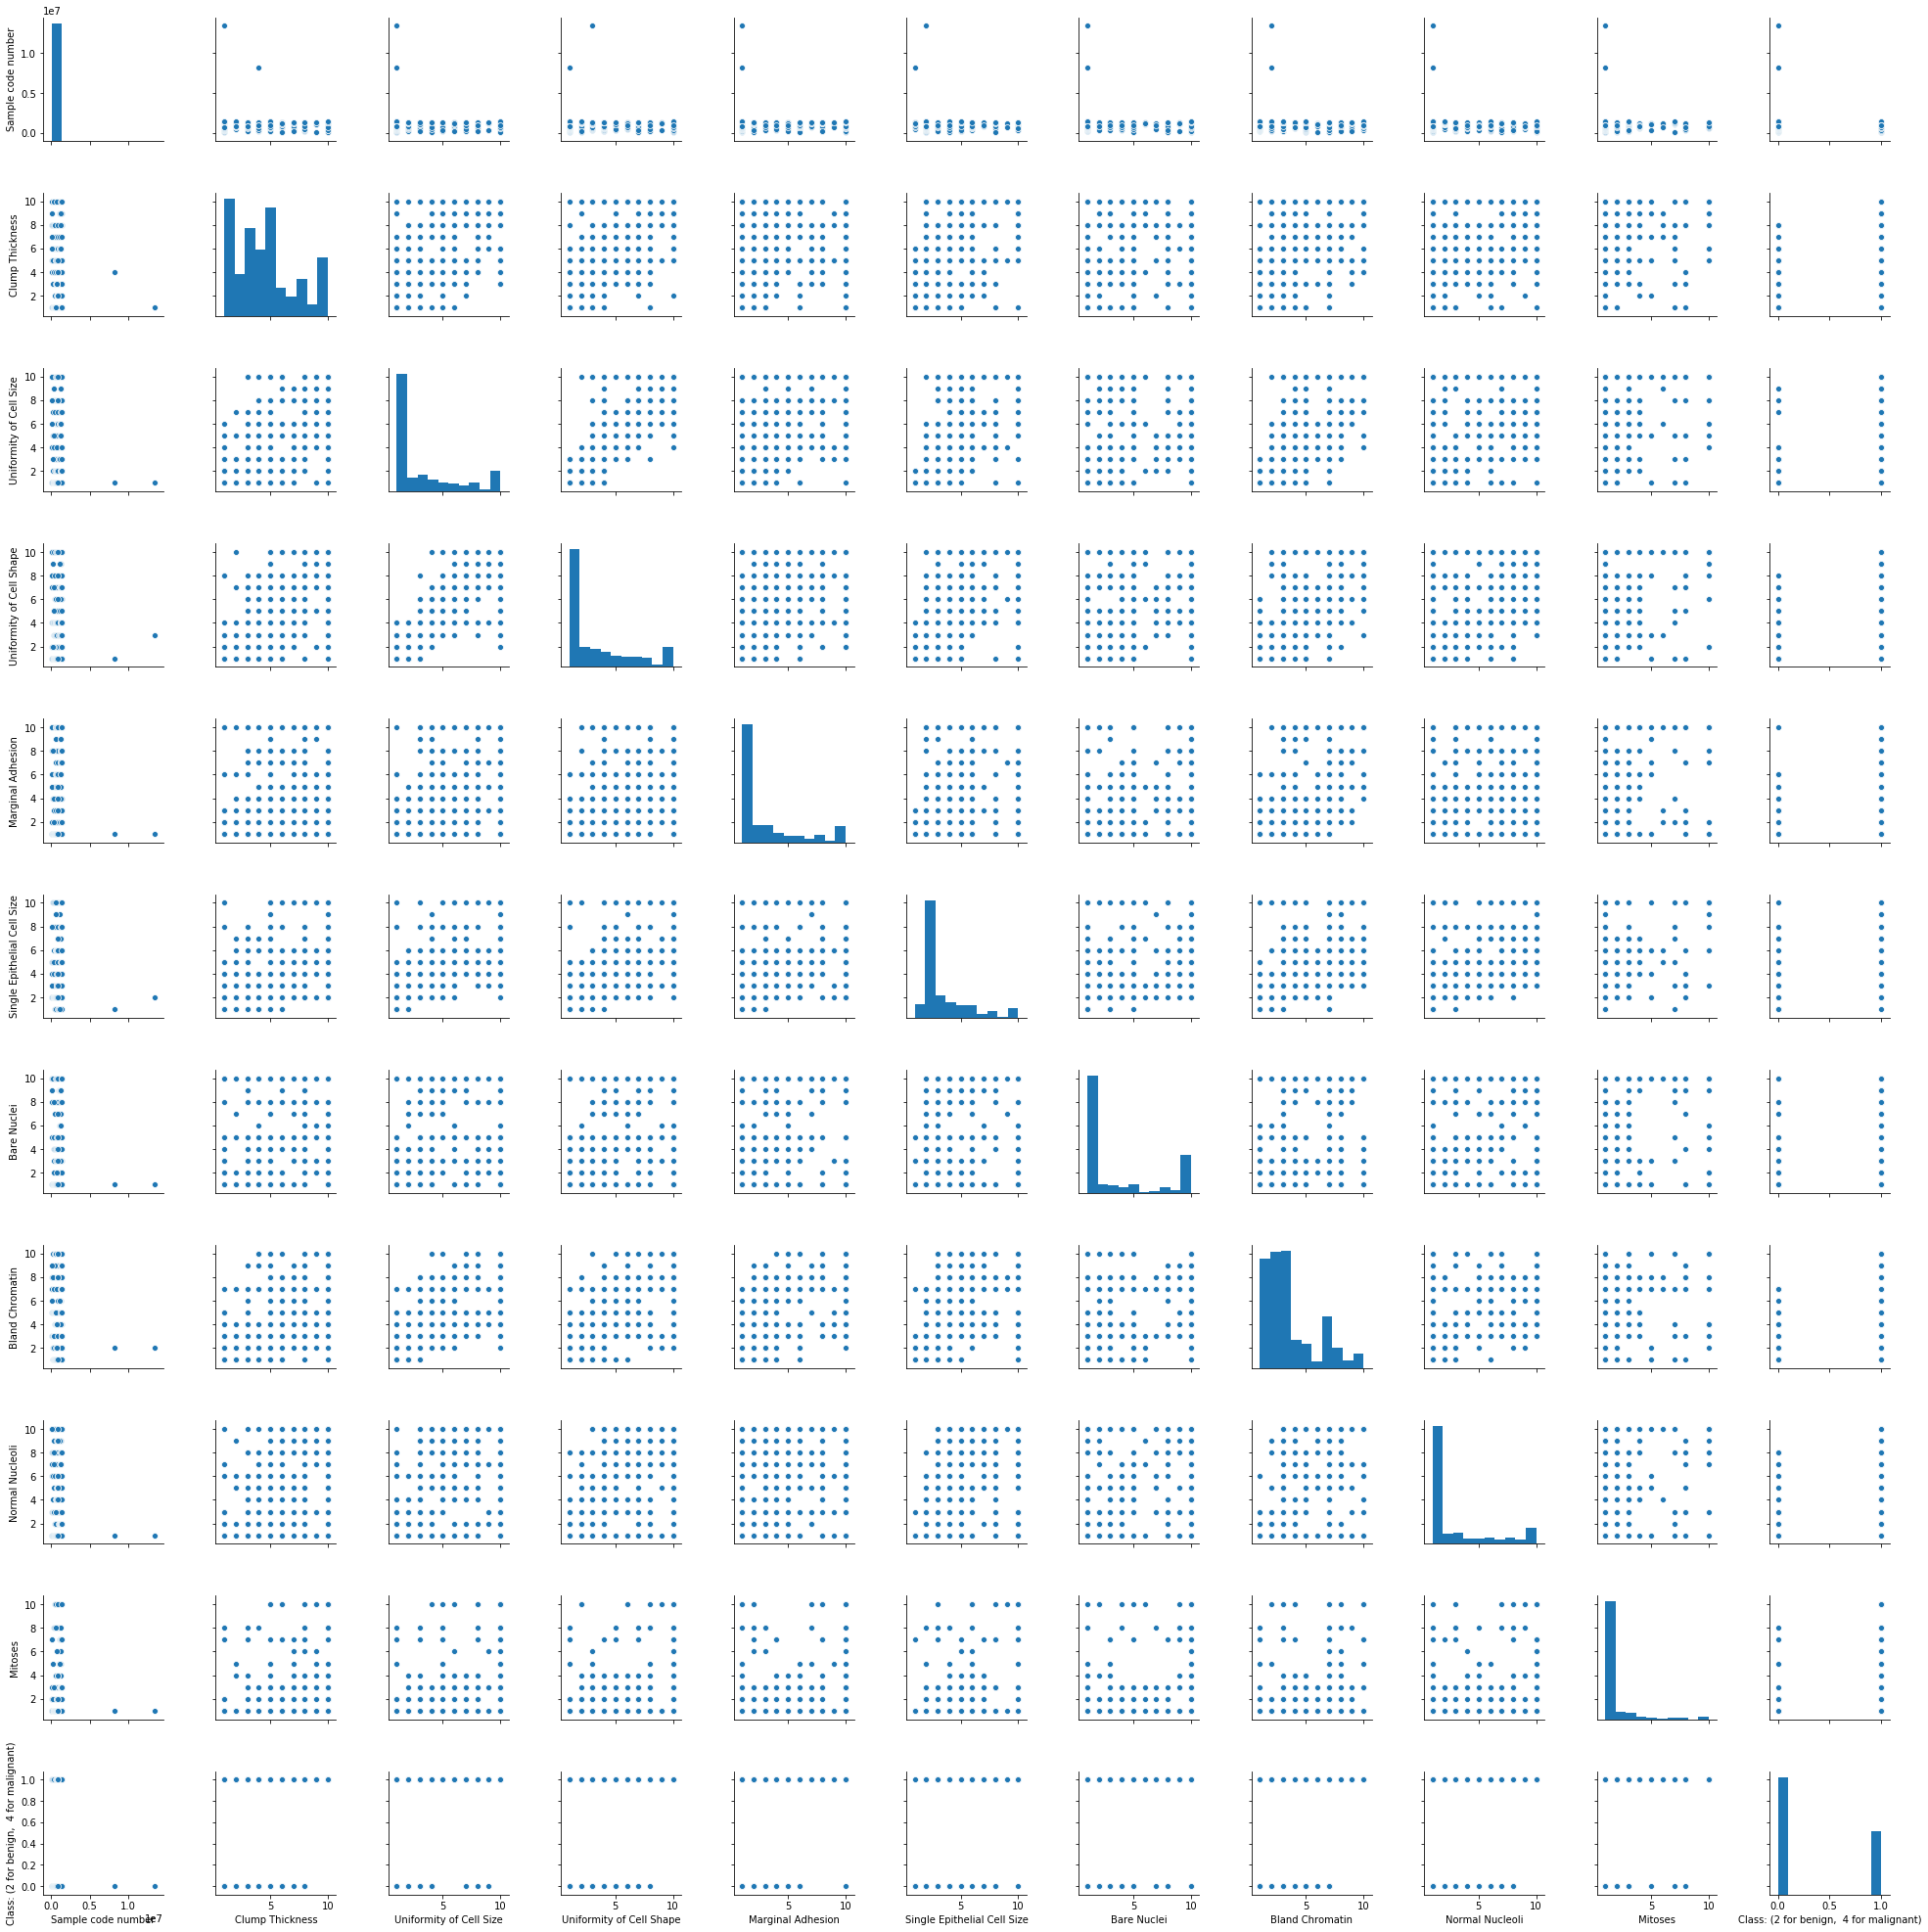

In [536]:
sns.pairplot(data)

No linear correlation as such is visible in the pairplot.

Let's observe the distribution of various factors on the basis of benign/malignant.

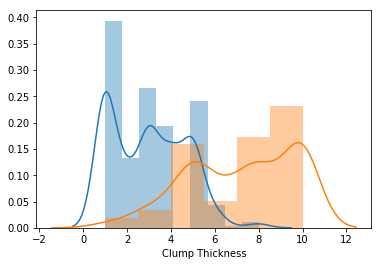

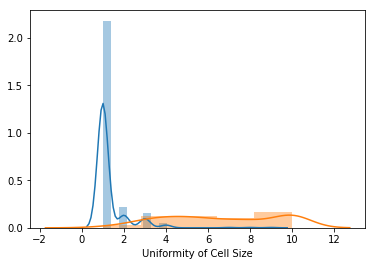

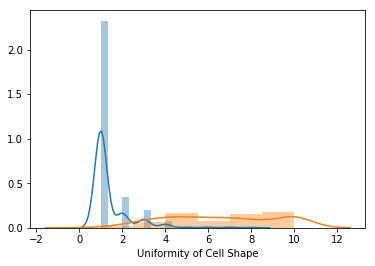

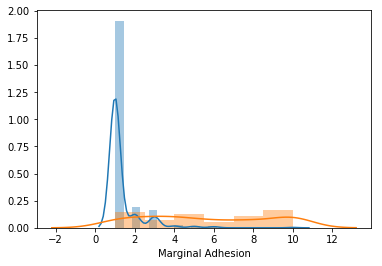

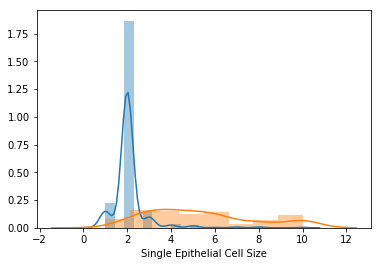

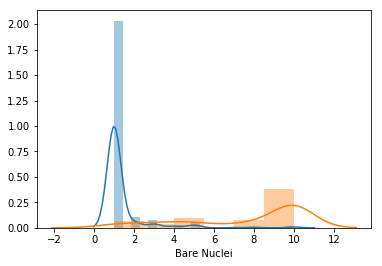

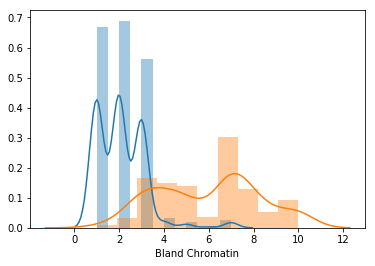

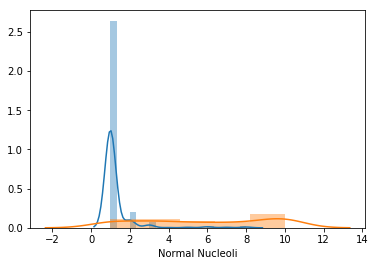

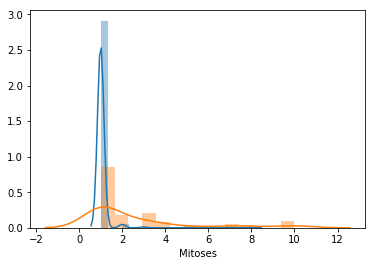

In [537]:
for x in data.columns:
    if(x != 'Sample code number' and x != 'Class: (2 for benign,  4 for malignant)'):
        plt.figure()
        sns.distplot(data[data['Class: (2 for benign,  4 for malignant)'] == 0][x])
        sns.distplot(data[data['Class: (2 for benign,  4 for malignant)'] == 1][x])

Hence, most features have well-separated definitions for benign and malignant tumors, except *Mitoses* for one.

# Feature selection and training the model

#### Baseline model(with all features)

In [538]:
FEATURES = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses']

In [539]:
FEATURES_2 = ['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli']

In [540]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

In [364]:
clf = RandomForestClassifier()

In [362]:
kf = StratifiedKFold(n_splits=7, shuffle=True)

In [159]:
indices = list(kf.split(data[FEATURES], data['Class: (2 for benign,  4 for malignant)']))
count = 1
score = 0
for train_index, test_index in indices:
    train_index = list(train_index)
    test_index = list(test_index)
    X_train = data[FEATURES].iloc[train_index]
    y_train = data['Class: (2 for benign,  4 for malignant)'].iloc[train_index]
    X_test = data[FEATURES].iloc[test_index]
    y_test = data['Class: (2 for benign,  4 for malignant)'].iloc[test_index]
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    #print(predict[:10])
    #predict = np.round(predict)
    #print(*zip(predict, y_test))
    print("Iter {0}: {1}".format(count, accuracy_score(predict, y_test)))
    score += accuracy_score(predict, y_test)
    count += 1

Iter 1: 0.9393939393939394
Iter 2: 0.9693877551020408
Iter 3: 0.9591836734693877
Iter 4: 0.979381443298969
Iter 5: 0.9587628865979382
Iter 6: 0.9484536082474226
Iter 7: 0.979381443298969


In [109]:
BaseResults = []

In [125]:
BaseResults.append(('MLP',score/7))

In [126]:
BaseResults

[('SVC', 0.9619181809377475),
 ('RFC', 0.9633455470821346),
 ('GBC', 0.9692966756926361),
 ('MLP', 0.973610044723026)]

On scaling the features:

In [232]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(data[FEATURES], data['Class: (2 for benign,  4 for malignant)'])
data_scaled = pd.DataFrame(scaler.fit_transform(X_train[FEATURES]), columns=FEATURES)
data_scaled_test = pd.DataFrame(scaler.fit_transform(X_test[FEATURES]), columns=FEATURES)
clf = RandomForestClassifier()
clf.fit(data_scaled[FEATURES], y_train)
predictions = clf.predict(data_scaled_test)
accuracy_score(predictions, y_test)

0.9590643274853801

No significant difference.

We can use SelectKBest as well as PCA for improving the score, since the features were heavily correlated.

#### Using SelectKBest

In [129]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [133]:
data.columns[SelectKBest(chi2, k=5).fit(data, data['Class: (2 for benign,  4 for malignant)']).get_support()]

Index(['Sample code number', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Bare Nuclei', 'Normal Nucleoli'],
      dtype='object')

In [139]:
CHI2_FEATURES = ['Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Bare Nuclei', 'Normal Nucleoli']

In [135]:
chi2Results = [] #Obtained by putting the list in the above KFold cell.

In [160]:
chi2Results.append(('MLP',score/7))

In [161]:
chi2Results

[('SVC', 0.9648186047302395),
 ('RFC', 0.9633752996892068),
 ('GBC', 0.95613114706319),
 ('MLP', 0.961992107058381)]

Our base model seems to be performing better than chi2 filtering.

#### PCA

In [455]:
from sklearn.decomposition import PCA

In [456]:
X_train, X_test, y_train, y_test = train_test_split(data[FEATURES], data['Class: (2 for benign,  4 for malignant)'])

In [457]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(X_train[FEATURES]), columns=FEATURES)

In [458]:
data_scaled.head()

Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0         0.254228                -0.675965                 -0.717823   
1         0.254228                -0.017365                 -0.717823   
2        -0.824485                -0.675965                 -0.717823   
3        -1.184055                -0.675965                 -0.717823   
4         0.254228                -0.675965                 -0.717823   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0           1.227153                    -0.090771    -0.664663   
1          -0.606771                    -0.533386    -0.664663   
2          -0.606771                    -0.976001    -0.664663   
3          -0.239986                    -0.976001    -0.664663   
4          -0.606771                    -0.533386    -0.664663   

   Bland Chromatin  Normal Nucleoli   Mitoses  
0        -0.965519        -0.604005 -0.323442  
1        -0.965519        -0.604005 -0.323442  
2        -0.965519        -0.604005 -0.323442  
3        -0.965519        -0.604005 -0.323442  
4        -0.550800        -0.604005 -0.323442

In [459]:
pca = PCA(svd_solver='full')
pca.fit(data_scaled[FEATURES])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [460]:
pca.explained_variance_ratio_

array([0.66621183, 0.08773439, 0.05945947, 0.04834206, 0.04004454,
       0.03417387, 0.02939544, 0.0255849 , 0.00905349])

Plotting the above components:

In [461]:
comp = ['comp'+str(x) for x in range(9)]

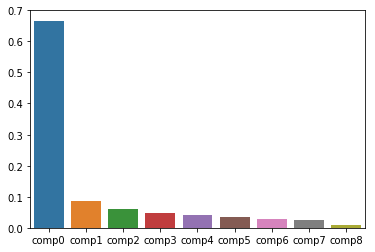

In [462]:
sns.barplot(x=comp,y = pca.explained_variance_ratio_)

In [463]:
summed_ratio = np.cumsum(pca.explained_variance_ratio_)

Text(0.5,1,'Scree plot for the components')

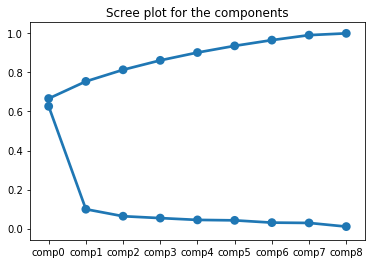

In [547]:
sns.pointplot(x=comp,y = summed_ratio)
sns.pointplot(x=comp,y = pca.explained_variance_ratio_)
plt.title('Scree plot for the components')

We see that comp0 dominates the explained variance.

We want to explain ~90% variance though. That amounts to the first 6 components.

In [465]:
data_scaled_test = pd.DataFrame(scaler.fit_transform(X_test[FEATURES]), columns=FEATURES)

In [466]:
data_scaled = pd.DataFrame(pca.transform(data_scaled), columns=['PC'+str(x) for x in range(9)])

In [467]:
data_scaled_test.head()

Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0        -1.349098                -0.783090                 -0.815637   
1        -0.308365                 1.139040                  1.470822   
2        -0.308365                -0.783090                 -0.815637   
3        -1.349098                -0.142380                 -0.162363   
4         0.732368                 1.459395                 -0.162363   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0          -0.741533                    -0.628851    -0.806194   
1          -0.112242                     0.322773     1.487212   
2          -0.741533                    -0.628851    -0.806194   
3          -0.426888                    -0.628851    -0.806194   
4           1.146341                     0.322773     0.213097   

   Bland Chromatin  Normal Nucleoli   Mitoses  
0        -1.108276        -0.641431 -0.418212  
1         2.063527        -0.641431 -0.418212  
2        -0.315325        -0.641431 -0.418212  
3         1.270576        -0.301850 -0.418212  
4         1.270576         1.735638  0.096279

In [468]:
PCA_FEATURES = ['PC'+str(x) for x in range(6)]

In [469]:
clf = SVC(probability=True)

In [470]:
clf.fit(data_scaled[PCA_FEATURES], y_train)
pca.fit(data_scaled_test[FEATURES])
data_scaled_test = pd.DataFrame(pca.transform(data_scaled_test), columns=['PC'+str(x) for x in range(9)])
predictions = clf.predict(data_scaled_test[PCA_FEATURES])
accuracy_score(predictions, y_test)

0.9649122807017544

In [416]:
PCAResult = []

In [434]:
PCAResult.append(('PCA+SVC',0.9649122807017544))

Hence we see that (PCA+RFC) provides us with the best results thus far.

# Removing False positives as well as False negatives

In [336]:
from sklearn.metrics import confusion_matrix

Text(33,0.5,'True value')

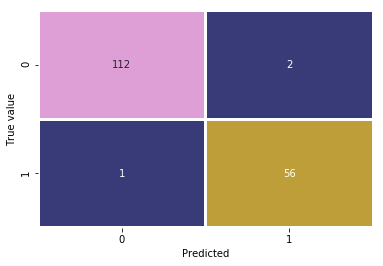

In [356]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='tab20b', cbar=False, linewidths=2)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [343]:
print(tn, fp, fn, tp)

112 2 1 56


We see here that we have 2 False Positives(FP) and 1 False Negative(FN).

In [359]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

0.9739130434782608

The f1_score is given as : F1 = 2 * (precision * recall) / (precision + recall).
Hence, it is a weighted average of Precision(TP/(TP+FP)) and Recall(TP/(TP+FN)).

By the task, we have to reduce the patients who are predicted to have benign(0), but have malignant(1). In other words, we have to minimise False negatives, i.e., maximise Recall.

Now, a FN occurs when the internal threshold of say, SVC, predicts False when the truth value is True. So, we have to find a threshold such that it maximises the Truth prediction, even at a little expense of accuracy and/or precision.

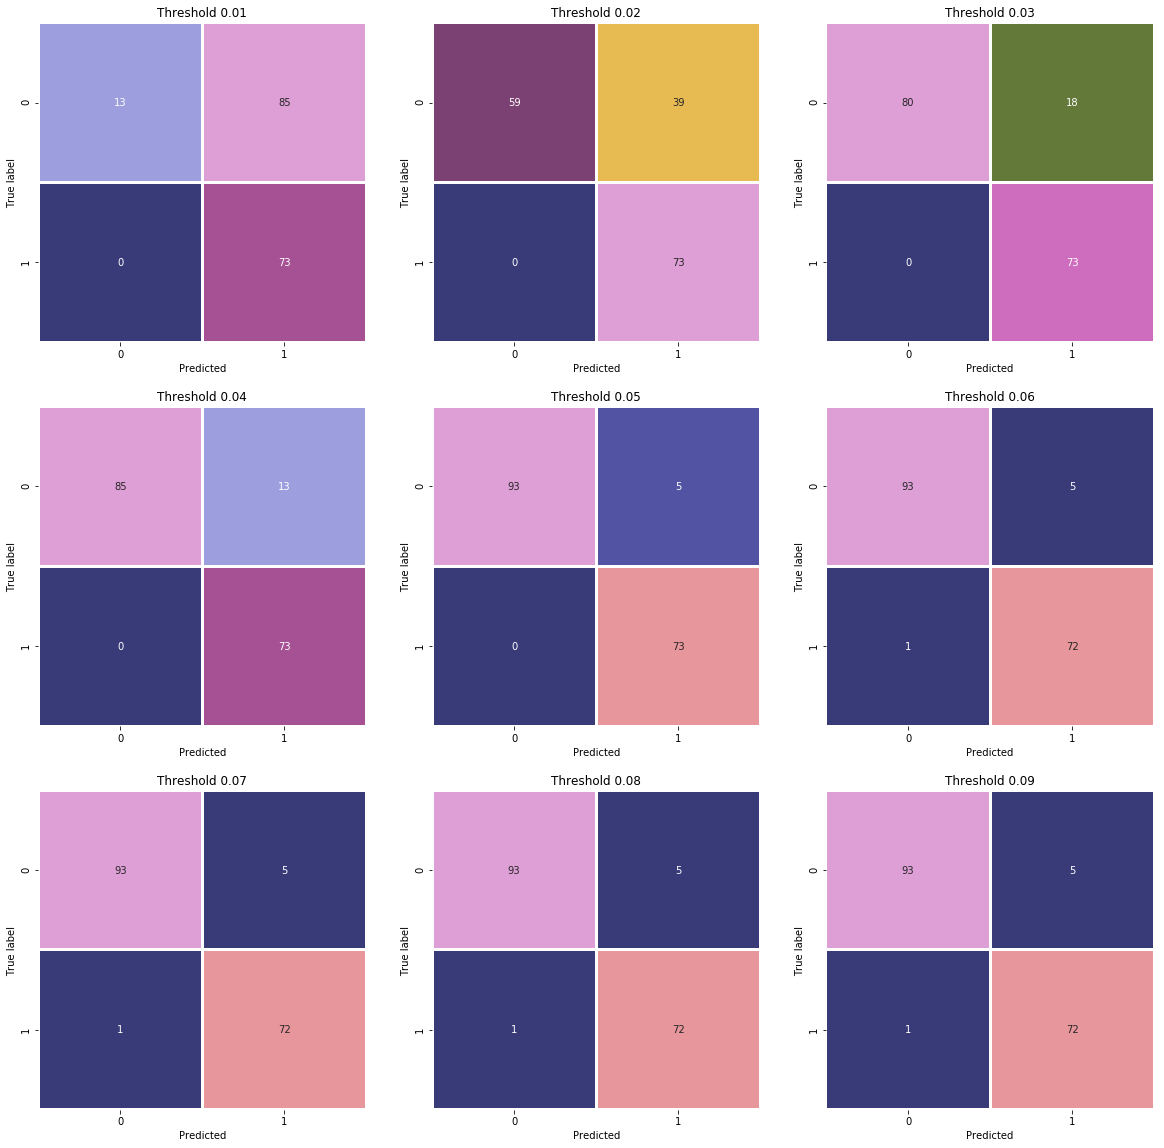

In [488]:
threshold_list = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09];
plt.figure(figsize=(20,20))
j=1
for threshold in threshold_list:
    pred_thres = clf.predict_proba(data_scaled_test[PCA_FEATURES])[:, 1] > threshold
    plt.subplot(3,3,j)
    cm = confusion_matrix(y_test, pred_thres)
    sns.heatmap(cm, cbar = False, annot=True,cmap='tab20b',linewidths=2,)
    plt.xlabel('Predicted')
    plt.ylabel('True label')
    plt.title("Threshold "+str(threshold))
    j += 1

Since 0.05 seems like the right threshold, let's calculate accuracy, precision, etc at that threshold:

In [489]:
pred_thres = clf.predict_proba(data_scaled_test[PCA_FEATURES])[:, 1] > 0.05
tn, fp, fn, tp = confusion_matrix(y_test, pred_thres).ravel()
precision = tp / (tp+fp)
recall = tp / (tp+fn)
accuracy = (tp+tn) / (tp+tn+fp+fn)
print("Accuracy:{0}\nPrecision:{1}\nRecall:{2}".format(accuracy, precision, recall))

Accuracy:0.9707602339181286
Precision:0.9358974358974359
Recall:1.0


# Conclusion

We hence conclude our analysis, with PCA+RFC fetching in the best results for the model, and also by discussing a technique to boost precision/recall for our model.

In [495]:
res1 = pd.DataFrame(BaseResults)
res2 = pd.DataFrame(chi2Results)
res3 = pd.DataFrame(PCAResult)

Text(0.5,1,'Baseline model')

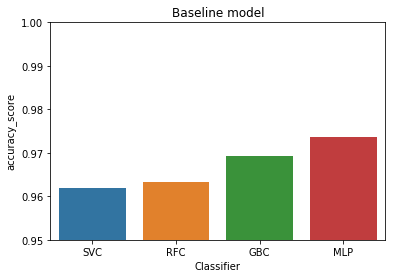

In [510]:
sns.barplot(x=res1[0],y=res1[1])
plt.ylim(0.95,1)
plt.xlabel('Classifier')
plt.ylabel('accuracy_score')
plt.title('Baseline model')

Text(0.5,1,'Chi2 filtered features based model')

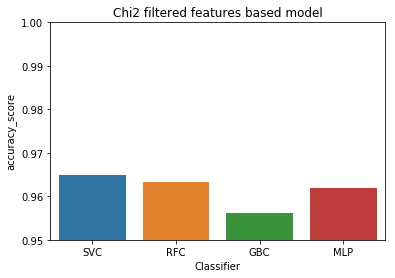

In [511]:
sns.barplot(x=res2[0],y=res2[1])
plt.ylim(0.95,1)
plt.xlabel('Classifier')
plt.ylabel('accuracy_score')
plt.title('Chi2 filtered features based model')

Text(0.5,1,'PCA based model')

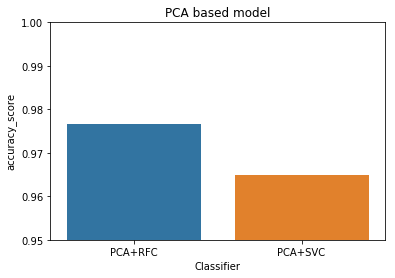

In [512]:
sns.barplot(x=res3[0],y=res3[1])
plt.ylim(0.95,1)
plt.xlabel('Classifier')
plt.ylabel('accuracy_score')
plt.title('PCA based model')